# MNIST Classifier using only Python & numpy

This project was a way for me to understand how neural network works behind the huge libraries like Tensorflow, PyTorch and many more. So, I implemented a three-layer neural network from pure Python (numpy) and trained it on the MNIST digit dataset.

I will continue to contribute to this notebook as I learn more about Neural Networks' in and outs. Goal is to achieve as close to 100% accuracy rate as possible.

On other notes, not all of this code is mine. I went over 10+ videos and articles to build this so there can definetly be snippets from those resources.

Dataset: https://drive.google.com/file/d/1eEKzfmEu6WKdRlohBQiqi3PhW_uIVJVP


**Last updated: 10/12/2024**


In [82]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/content/data/mnist_train.csv')

In [83]:
data.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

test_data = data[0:1000].T
Y_test = test_data[0]
X_test = test_data[1:n]
X_test = X_test / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [85]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5

    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5

    W3 = np.random.rand(10, 10) - 0.5
    b3 = np.random.rand(10, 1) - 0.5

    return W1, b1, W2, b2, W3, b3

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))

    return A

def forward(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)

    return Z1, A1, Z2, A2, Z3, A3

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T

    return one_hot_Y

def backward(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)

    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3
    return W1, b1, W2, b2, W3, b3

In [86]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A3)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2, W3, b3

In [46]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, 0.1, 5000)

Iteration:  0
[6 5 3 ... 3 3 0] [4 9 0 ... 2 6 4]
0.09166257055204326
Iteration:  10
[6 3 5 ... 3 5 0] [4 9 0 ... 2 6 4]
0.16079933558195902
Iteration:  20
[3 5 5 ... 3 6 0] [4 9 0 ... 2 6 4]
0.22503771250360174
Iteration:  30
[0 6 0 ... 3 6 0] [4 9 0 ... 2 6 4]
0.258207766233326
Iteration:  40
[0 6 0 ... 3 6 0] [4 9 0 ... 2 6 4]
0.2812929032695469
Iteration:  50
[0 6 0 ... 3 6 0] [4 9 0 ... 2 6 4]
0.30227630976796216
Iteration:  60
[0 6 0 ... 3 6 0] [4 9 0 ... 2 6 4]
0.3269038458278954
Iteration:  70
[6 6 0 ... 3 6 0] [4 9 0 ... 2 6 4]
0.360548483872608
Iteration:  80
[6 6 0 ... 3 6 0] [4 9 0 ... 2 6 4]
0.4002101730537806
Iteration:  90
[6 9 0 ... 3 6 0] [4 9 0 ... 2 6 4]
0.44622790216783337
Iteration:  100
[6 9 0 ... 2 6 7] [4 9 0 ... 2 6 4]
0.4875845353311073
Iteration:  110
[4 9 0 ... 2 6 7] [4 9 0 ... 2 6 4]
0.5193986338751504
Iteration:  120
[4 9 0 ... 2 6 7] [4 9 0 ... 2 6 4]
0.5462126476719944
Iteration:  130
[4 9 0 ... 2 6 7] [4 9 0 ... 2 6 4]
0.5704333971762233
Iteration:  14

In [87]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward(W1, b1, W2, b2, W3, b3, X)  # Get output from the last layer
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3, row_num, num_plots):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]


    plt.subplot(1, num_plots, row_num + 1)
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.title(f'Prediction: {prediction}, Label: {label}')
    plt.axis('off')


Examples from the training data set:

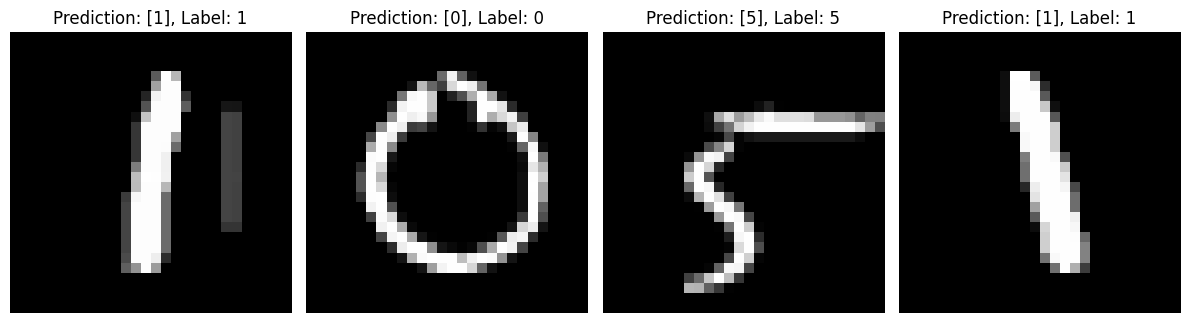

In [88]:
num_plots = 4  # Total number of plots
plt.figure(figsize=(12, 4))  # Adjust figure size if needed

test_prediction(312, W1, b1, W2, b2, W3, b3, 0, num_plots)  # row_num starts from 0
test_prediction(563, W1, b1, W2, b2, W3, b3, 1, num_plots)
test_prediction(31414, W1, b1, W2, b2, W3, b3, 2, num_plots)
test_prediction(965, W1, b1, W2, b2, W3, b3, 3, num_plots)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

Finally, let's find the accuracy on a testing data set:

In [89]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2, W3, b3)
accuracy = get_accuracy(test_predictions, Y_test)
print(f"Average accuracy on the test set: {accuracy * 100:.2f}%")

Average accuracy on the test set: 92.40%
